In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf


In [19]:
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import string, re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.utils import text_dataset_from_directory

# Import necessary libraries
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,BatchNormalization,Flatten, TextVectorization, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,  BatchNormalization
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D

In [7]:
#Load the datasets

reviews_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [8]:
reviews_df.head()

,Id,Review,Rating
0,0,Very good value and a great tv very happy and ...,5
1,1,After 6 month still can't access my account,3
2,2,I couldn't make an official review on a produc...,1
3,3,"Fantastic! Extremely easy to use website, fant...",5
4,4,So far annoyed as hell with this bt monthly pa...,1


In [9]:
def sentiment_class(x):
  if x in (1,2):
    return 'negative'
  elif x == 3:
    return 'neutral'
  else:
    return 'positive'

reviews_df['Sentiment'] = reviews_df['Rating'].apply(sentiment_class)
reviews_df['Sentiment'].value_counts()

Sentiment
positive    38029
negative    20292
neutral      1679
Name: count, dtype: int64

In [10]:
reviews_df = reviews_df[reviews_df['Sentiment']!= 'neutral']

reviews_df.head()

,Id,Review,Rating,Sentiment
0,0,Very good value and a great tv very happy and ...,5,positive
2,2,I couldn't make an official review on a produc...,1,negative
3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
4,4,So far annoyed as hell with this bt monthly pa...,1,negative
5,5,Correct replacement delivered on time now my v...,5,positive


In [11]:
reviews_df = reviews_df.reset_index()
reviews_df

,index,Id,Review,Rating,Sentiment
0,0,0,Very good value and a great tv very happy and ...,5,positive
1,2,2,I couldn't make an official review on a produc...,1,negative
2,3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
3,4,4,So far annoyed as hell with this bt monthly pa...,1,negative
4,5,5,Correct replacement delivered on time now my v...,5,positive
...,...,...,...,...,...
58316,59995,59995,"Response was very quick, engineer arrived when...",5,positive
58317,59996,59996,"I'm trying my best to leave TalkTalk, unfortun...",1,negative
58318,59997,59997,Just what do we get for paying this money for ...,1,negative
58319,59998,59998,Could not make our mind on which TV to purchas...,5,positive


In [12]:
# Apply random shuffling to dataset before splitting the data
np.random.seed(0)
indices = np.arange(reviews_df.shape[0])
shuffled_indices = np.random.permutation(indices)
reviews_df = reviews_df.reindex(shuffled_indices)

X = reviews_df[['Review', 'Rating']]
y = reviews_df['Sentiment']

In [13]:
#Create data training and testing splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

In [14]:
#display few examples of each type of rating and sentiment class
for i in range(5):
  print('training example data:', X_train.iloc[i])
  print('training example label:', y_train.iloc[i])


training example data: Review    I ordered a TV for my sons Christmas present w...
Rating                                                    1
Name: 16051, dtype: object
training example label: negative
training example data: Review    From the beginning when I ordered, everything ...
Rating                                                    5
Name: 53063, dtype: object
training example label: positive
training example data: Review    We were moved to Shell when our previous energ...
Rating                                                    5
Name: 9363, dtype: object
training example label: positive
training example data: Review    Service was excellent and the tv was a great p...
Rating                                                    5
Name: 24346, dtype: object
training example label: positive
training example data: Review    Ordered a product, wrong item was sent, never ...
Rating                                                    1
Name: 33871, dtype: object
training example la

Rating
2      989
4     2001
1    11194
5    20808
Name: count, dtype: int64

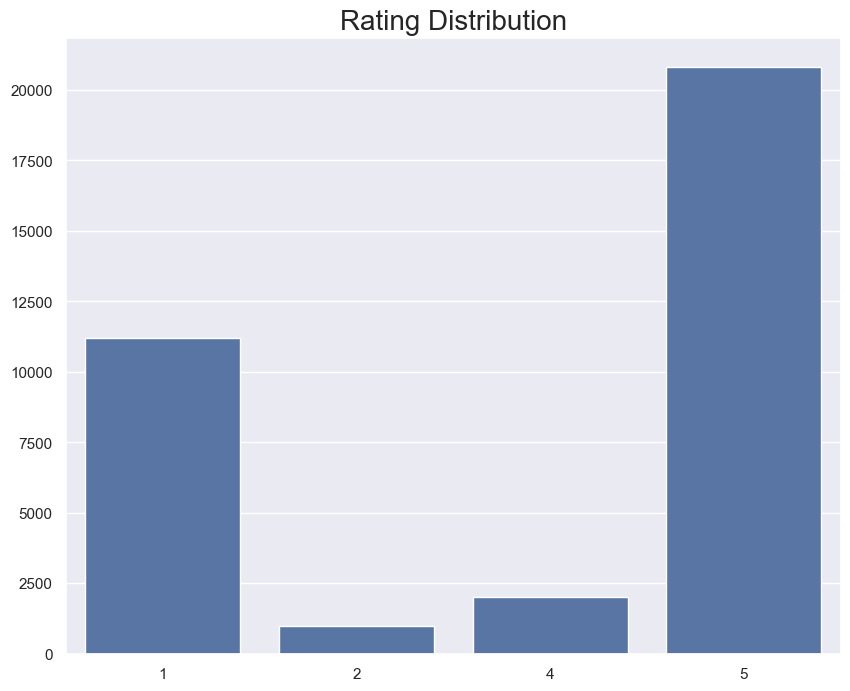

In [15]:
# View Train Rating Distribution
plt.figure(figsize=(10, 8))
plt.title('Rating Distribution', fontsize=20)

rating_distribution = X_train['Rating'].value_counts().sort_values()
sns.barplot(x=list(rating_distribution.keys()),
            y=rating_distribution.values)
display(rating_distribution.sort_values())

Sentiment
negative    12183
positive    22809
Name: count, dtype: int64

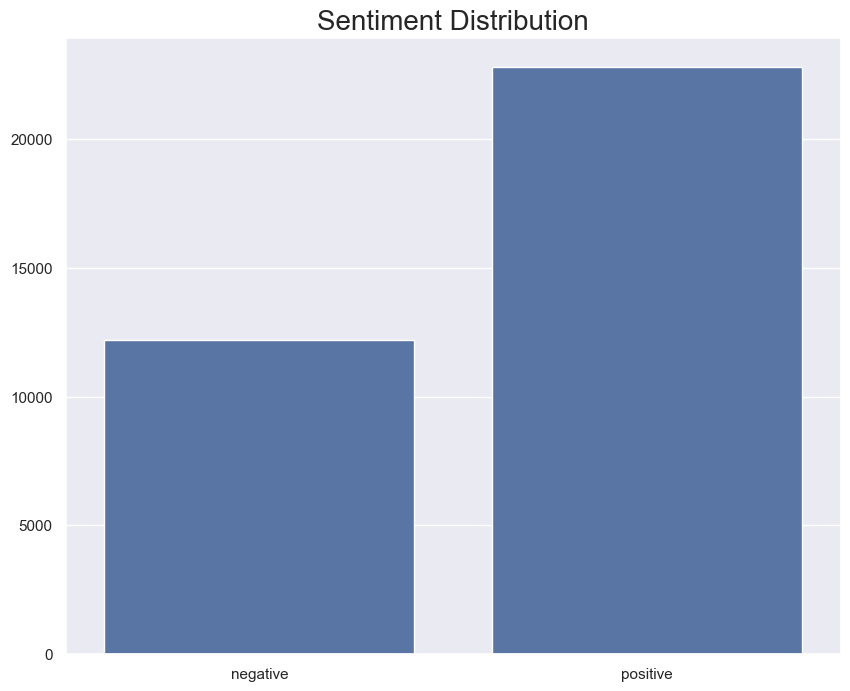

In [16]:
# View Sentiment Classification Distribution
plt.figure(figsize=(10, 8))
plt.title('Sentiment Distribution', fontsize=20)

sentiment_distribution = y_train.value_counts().sort_values()
sns.barplot(x=list(sentiment_distribution.keys()),
            y=sentiment_distribution.values)
display(sentiment_distribution.sort_values())

In [17]:
#Create a balanced dataset

# randomly draw 46000 examples from each class
df_balanced = pd.concat(
    [X_train, y_train],
    axis=1)


temp_positive = df_balanced[df_balanced.Sentiment == 'positive'].sample(
    n=12000,
    replace=False
)

temp_negative = df_balanced[df_balanced.Sentiment == 'negative'].sample(
    n=12000,
    replace=False
)

df_balanced = pd.concat(
    [temp_positive, temp_negative],
    axis=0)

# shuffle df_balanced
df_balanced = df_balanced.sample(frac=1) # frac=1 retains all the data
df_balanced.reset_index(drop=True, inplace=True) # reset index

print('After preprocessing, our data contains', df_balanced.shape[0], 'reviews.')

After preprocessing, our data contains 24000 reviews.


In [18]:
reviews_df.head()

,index,Id,Review,Rating,Sentiment
40701,41887,41887,The best! excellent customer service and amazi...,5,positive
27617,28418,28418,Great communication and delivery fro driver Cr...,5,positive
2049,2109,2109,They got back by return and so far I am pretty...,4,positive
36904,37974,37974,From ordering to delivery and price was very g...,5,positive
19053,19613,19613,This company should not be operating worse exp...,1,negative


In [22]:
# Separate positive and negative reviews
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'positive']['Review'].str.cat(sep=' ')
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'negative']['Review'].str.cat(sep=' ')

# Define stopwords
stopwords = set(STOPWORDS)

# Create WordCloud objects with stopwords removed
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(negative_reviews)

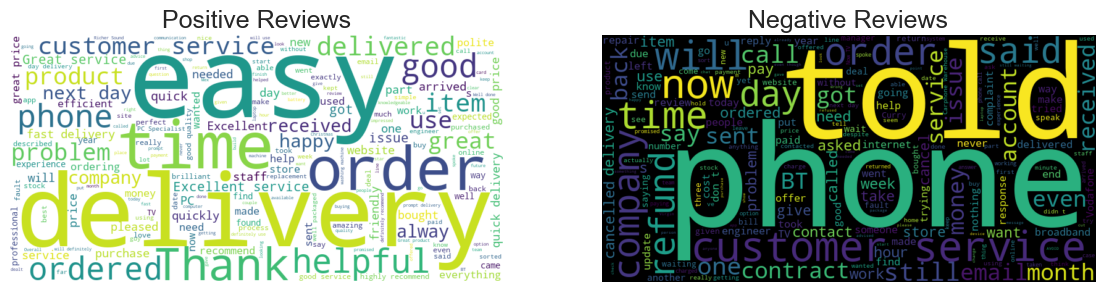

In [23]:
# Plot the word clouds
plt.figure(figsize=(14, 7))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews', fontsize=18)
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews', fontsize=18)
plt.axis('off')

plt.show()